<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/multivariable_linear_regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the basic structure

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf


x1d = [70,90, 88,95,75]
x2d = [80,88,90,98,65]
x3d = [75,93,90,100,70]
yd = [150, 185, 180, 200, 140]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = x1*w1 + x2*w2 + x3*w3 + b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x1:x1d, x2:x2d, x3:x3d, y:yd})
  if step % 10 == 0:
    print(step, 'cost:', cv, 'prediction:', hv)
    

## collected laout

In [0]:
# same thing but for collected layout


x1d = [ [70,90, 88,95,75],[80,88,90,98,65],[75,93,90,100,70] ]
x1d = np.transpose(x1d)
yd = np.transpose([150, 185, 180, 200, 140])


x = tf.placeholder(tf.float32, shape = [None, 3]) #not 5,3
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3,1]), name='weight1')
b = tf.Variable(tf.random_normal([1]), name='bias')

#hf = x1*w1 + x2*w2 + x3*w3 + b #cannot be used due to elementwise product. need dot product
hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:x1d, y:yd})
  if step % 10 == 0:
    print(step, 'cost:', cv, 'prediction:', hv)
    

ValueError: ignored

## another one

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:


xy = np.loadtxt('/content/drive/My Drive/T4IR/colab/0730data/test-score.csv',
               delimiter = ',', dtype = np.float32)
xtrain = xy[:,0:3]
ytrain = np.vstack(xy[:,3])


xdata = tf.placeholder(tf.float32, shape = [None, 3])
ydata = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3,1]), name='weight1')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())




init = tf.initialize_all_variables()
sess.run(init)



for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:xtrain, y:ytrain})
  if step == 2000:
    print(step, 'cost:', cv, 'prediction:', hv)


print("========================================")
    
q = [[100,70,102],[60,70,100],[80, 90, 95]]
q = np.transpose(q)
for i in q:
  print(sess.run(hf, feed_dict={x:i.reshape(-1,3)}))





In [0]:
test_label.shape

(10, 1)

## Practice with stock price

In [0]:
import pandas as pd
tsla = pd.read_csv('/content/drive/My Drive/T4IR/colab/0730data/TSLA.csv', parse_dates = ['Date'])

train_data = tsla[['Open', 'High', 'Low']].iloc[:-10,:]
train_label = tsla[['Close']].iloc[:-10,:]
test_data = tsla[['Open', 'High', 'Low']].iloc[-10:,:]
test_label =tsla[['Close']].iloc[-10:,:]


init = tf.initialize_all_variables()
sess.run(init)

tdata = tf.placeholder(tf.float32, shape = [None, 3])
tlabel = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-7).minimize(cost) #diverged --> lowered the leraning rate meh
sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:train_data, y:train_label})
#  if step == 2000:
#     print(step, 'cost:', cv, 'prediction:', hv)
    
    
print ("==============difference from the real value==================")
print(test_label - sess.run(hf, feed_dict={x:test_data}))





print("===============volume prediction=====================")
init = tf.initialize_all_variables()
sess.run(init)


train_data = tsla[['Open']]
train_label = tsla[['Close']]

init = tf.initialize_all_variables()
sess.run(init)

tdata = tf.placeholder(tf.float32, shape = [None, 1])
tlabel = tf.placeholder(tf.float32, shape=[None, 1])

w2 = tf.Variable(tf.random_normal([1,1]), name='weight')
b2 = tf.Variable(tf.random_normal([1]), name='bias')
y2 = tf.placeholder(tf.float32)



hf = x2*w2 + b2
cost = tf.reduce_mean(tf.square(hf-y2))
train = tf.train.GradientDescentOptimizer(1e-7).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x2:train_data, y2:train_label})


  
print('predicted volume:',sess.run(hf, feed_dict={x2:227.09}))



==============difference from the real value==================
         Close
241   8.923691
242   3.475190
243   1.135666
244   9.005173
245  -2.153289
246   8.115676
247  12.806152
248 -10.256653
249   0.917953
250  15.038650
===============volume prediction=====================
predicted volume: [[227.09866]]


# practice with housing price

1. sqt_living 에 따른 가격
- 데이터 8:2 분리
2. sqft_living, bedrooms, bathrooms 에 따른 price
3. sqft_living, bedrooms, bathrooms, sqft_lot, floor2 zipcode 에 따른 price

In [0]:
import pandas as pd
root = '/content/drive/My Drive/T4IR/colab/0730data/hosing_kaggle'
data1 = pd.read_csv(root+'/train.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living'])
data2 = pd.read_csv(root+'/train.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'zipcode'])
label = pd.read_csv(root+'/train.csv', usecols=['price'])

In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data1, label, test_size=0.2, random_state=42)
train_data2, test_data2, train_label2, test_label2 = train_test_split(data2, label, test_size=0.2, random_state=42)

In [0]:
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(12028, 3) (3007, 3) (12028, 1) (3007, 1)


In [0]:
import tensorflow as tf

# init = tf.initialize_all_variables()
# sess.run(init)

tdata = tf.placeholder(tf.float32, shape = [None, 3])
tlabel = tf.placeholder(tf.float32, shape=[None, 1])



x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-7).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(2001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:train_data, y:train_label})
#   if step == 2000:
#     print(step, 'cost:', cv, 'prediction:', hv)
    
    
print ("==============difference from the real value==================")
print(test_label - sess.run(hf, feed_dict={x:test_data}))

In [0]:

init = tf.initialize_all_variables()
sess.run(init)

tdata = tf.placeholder(tf.float32, shape = [None, 6])
tlabel = tf.placeholder(tf.float32, shape=[None, 1])



x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([6,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-10).minimize(cost)
sess.run(tf.global_variables_initializer())


for step in range(3001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:train_data2, y:train_label2})
#   if step == 3000:
#     print(step, 'cost:', cv, 'prediction:', hv)



    
print ("==============difference from the real value==================")
print(test_label2 - sess.run(hf, feed_dict={x:test_data2}))

In [0]:
##############
##############
##############
for step in range(3001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:train_data2, y:train_label2})
  if step == 3000:
      wv,bv,lv,_ = sess.run([cost, w, b, train], feed_dict={x:test_data2, y:test_label2})
      print("w:%s b:%s cost:%s" % (wv, bv, lv))

w:68811420000.0 b:[[-1.2588859e+00]
 [ 8.5329622e-01]
 [ 2.2278195e+02]
 [ 2.3646345e-02]
 [-1.9491901e-01]
 [ 8.1520897e-01]] cost:[0.4146298]


[-5, 10, 0, 15000]

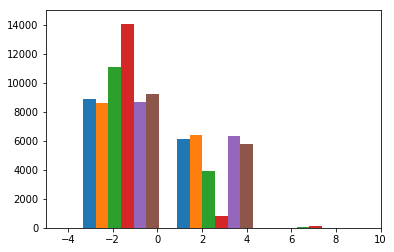

In [0]:
from sklearn import preprocessing

data2_scaled = preprocessing.scale(data2)
label_scaled = preprocessing.scale(label)

import matplotlib.pyplot as plt
plt.hist(data2_scaled)
plt.axis([-5, 10, 0, 15000])
# i think it's maybe okay

In [0]:
train_data2_2, test_data2_2, train_label2_2, test_label2_2 = train_test_split(data2_scaled, label_scaled, test_size=0.2, random_state=42)

In [0]:

init = tf.initialize_all_variables()
sess.run(init)

tdata = tf.placeholder(tf.float32, shape = [None, 6])
tlabel = tf.placeholder(tf.float32, shape=[None, 1])



x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([6,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)
sess.run(tf.global_variables_initializer())


for step in range(3001):
  cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:train_data2_2, y:train_label2_2})
#   if step == 3000:
#     print(step, 'cost:', cv, 'prediction:', hv)


    
print ("==============difference from the real value==================")
print(test_label2_2 - sess.run(hf, feed_dict={x:test_data2_2}))
# I used scale!
# it's not very effective...

==============difference from the real value==================
[[-0.2192659 ]
 [-3.53402486]
 [-1.60742124]
 ...
 [-2.41806873]
 [-1.51358731]
 [-3.19507753]]


In [0]:
sess.close()